# Lab3 - Data Mining

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data=pd.read_csv("people-100_MV-1.csv",index_col=0)
data.head()

,User Id,First Name,Last Name,Gender,Email,Phone,Date of birth,Job Title
Index,,,,,,,,
1,88F7B33d2bcf9f5,Shelby,Terrell,Male,elijah57@example.net,001-084-906-7849x73518,26-10-1945,Games developer
2,f90cD3E76f1A9b9,Phillip,Summers,Female,bethany14@example.com,214.112.6044x4913,24-03-1910,Phytotherapist
3,DbeAb8CcdfeFC2c,Kristine,Travis,Male,bthompson@example.com,277.609.7938,02-07-1992,Homeopath
4,A31Bee3c201ef58,Yesenia,Martinez,Male,kaitlinkaiser@example.com,584.094.6111,03-08-2017,Market researcher
5,1bA7A3dc874da3c,Lori,Todd,Male,buchananmanuel@example.net,689-207-3558x7233,01-12-1938,Veterinary surgeon


 ## Task1 : Create a box plot to visualize the distribution of gender on each bins include an extra attribute Income in the given datas

In [22]:
from datetime import date
from dateutil.relativedelta import relativedelta

In [23]:
ages=[]
for d in data['Date of birth']:
  if pd.isna(d):
    ages.append(np.nan)
  else:
    current_date=date.today()
    value=date(int(d[6:]),int(d[3:5]),int(d[:2]))
    age=current_date.year-value.year-((current_date.month,current_date.day)<(value.month,value.day))
    ages.append(age)
data['Age']=ages
data[['First Name','Date of birth','Age']].head()

,First Name,Date of birth,Age
Index,,,
1,Shelby,26-10-1945,78.0
2,Phillip,24-03-1910,113.0
3,Kristine,02-07-1992,31.0
4,Yesenia,03-08-2017,6.0
5,Lori,01-12-1938,85.0


In [24]:
data['Gender']=np.where(data['Gender'].isin(['Male', 'Female']),data['Gender'],np.nan)
bins=np.arange(0,130,10)
data['AgeBin']=pd.cut(data['Age'],bins)
res=data.groupby(['AgeBin','Gender']).size().unstack(fill_value=0)
res

Gender,Female,Male
AgeBin,,
"(0, 10]",1,5
"(10, 20]",5,6
"(20, 30]",3,3
"(30, 40]",4,3
"(40, 50]",7,0
"(50, 60]",2,3
"(60, 70]",5,5
"(70, 80]",3,5
"(80, 90]",1,3


In [25]:
mean_age=data['Age'].mean()
data['Age']=np.where(data['Age'].isna(),mean_age,data['Age'])
data[['First Name','Age']].head()

,First Name,Age
Index,,
1,Shelby,78.0
2,Phillip,113.0
3,Kristine,31.0
4,Yesenia,6.0
5,Lori,85.0


<Axes: title={'center': 'Age'}, xlabel='Gender'>

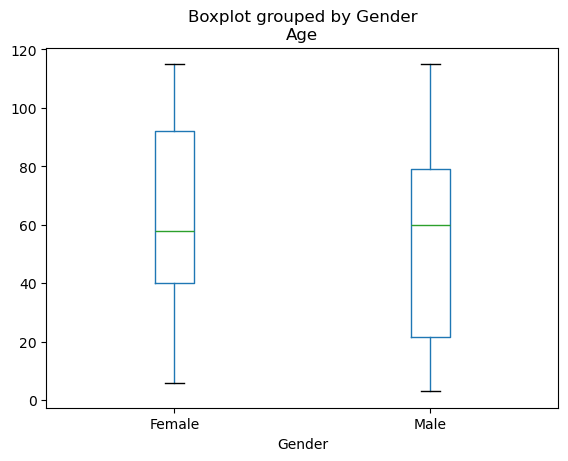

In [26]:
data.boxplot(by ='Gender', column =['Age'], grid = False)